# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [14]:
# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
appid = weather_api_key

In [34]:
test = cities[:10]
test

['novoagansk',
 'vaitupu',
 'bubaque',
 'dois corregos',
 'port alfred',
 'rikitea',
 'mataura',
 'vaini',
 'irpa irpa',
 'port hueneme']

In [149]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

counter = 1
city_data = []

for city in cities:
    params = {
      "q" : city,
      "units" : "imperial",
      "appid" : weather_api_key
       }
    try:
        weather = requests.get(base_url, params=params).json()
        lat = weather["coord"]["lat"]
        lon = weather["coord"]["lon"]
        temp = weather["main"]["temp_max"]
        humid = weather["main"]["humidity"]
        cloud = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        date = datetime.fromtimestamp(weather["dt"]).date()

        city_data.append({"City" : city
                        ,"Latitude" : lat
                        ,"Longitude" : lon
                        ,"Max Temperature": temp
                        ,"Humidity": humid
                        ,"Cloudiness": cloud
                        ,"Wind Speed" : wind
                        ,"Country" : country
                        ,"Date" : date})

        print(f"Processing Record {counter} - {city}")
        counter = counter + 1
    except:
        print("City not found. Skipping")


Processing Record 1 - novoagansk
City not found. Skipping
Processing Record 2 - bubaque
Processing Record 3 - dois corregos
Processing Record 4 - port alfred
Processing Record 5 - rikitea
Processing Record 6 - mataura
Processing Record 7 - vaini
Processing Record 8 - irpa irpa
Processing Record 9 - port hueneme
Processing Record 10 - riyadh
Processing Record 11 - qaanaaq
Processing Record 12 - bluff
City not found. Skipping
Processing Record 13 - albany
Processing Record 14 - atuona
Processing Record 15 - kalanaur
Processing Record 16 - kushiro
Processing Record 17 - hithadhoo
Processing Record 18 - lujiang
City not found. Skipping
Processing Record 19 - coihaique
Processing Record 20 - kapaa
Processing Record 21 - qaqortoq
Processing Record 22 - ushuaia
Processing Record 23 - carnarvon
Processing Record 24 - cayenne
City not found. Skipping
Processing Record 25 - pecanha
Processing Record 26 - cherskiy
Processing Record 27 - zermatt
Processing Record 28 - zhuhai
Processing Record 29 -

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [150]:
city_data_df = pd.DataFrame(city_data)

In [151]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             562 non-null    object 
 1   Latitude         562 non-null    float64
 2   Longitude        562 non-null    float64
 3   Max Temperature  562 non-null    float64
 4   Humidity         562 non-null    int64  
 5   Cloudiness       562 non-null    int64  
 6   Wind Speed       562 non-null    float64
 7   Country          562 non-null    object 
 8   Date             562 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.6+ KB


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [152]:
#  Get the indices of cities that have humidity over 100%.
city_index = city_data_df[city_data_df["Humidity"]>100].index
city_index

Int64Index([], dtype='int64')

In [153]:
clean_city_data = city_data_df.drop(city_index)
clean_city_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,novoagansk,61.94,76.66,76.86,29,100,18.88,RU,2020-05-09
1,bubaque,11.28,-15.83,78.13,73,92,12.46,GW,2020-05-09
2,dois corregos,-22.37,-48.38,55.00,90,21,5.01,BR,2020-05-09
3,port alfred,-33.59,26.89,63.00,97,0,1.34,ZA,2020-05-09
4,rikitea,-23.12,-134.97,75.36,72,28,6.40,PF,2020-05-09
...,...,...,...,...,...,...,...,...,...
557,krasnokamensk,50.10,118.04,62.78,31,90,4.72,RU,2020-05-09
558,pueblo rico,5.24,-76.04,66.81,88,100,1.45,CO,2020-05-09
559,lompoc,34.64,-120.46,61.00,100,90,5.82,US,2020-05-09
560,mananara,-16.17,49.77,79.99,71,48,7.63,MG,2020-05-09


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [154]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("city_data.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [155]:
max_date=clean_city_data["Date"].max()

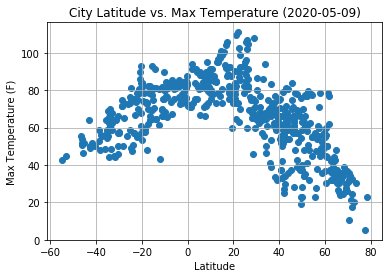

In [156]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Max Temperature"])
ax.set_title(f"City Latitude vs. Max Temperature ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()

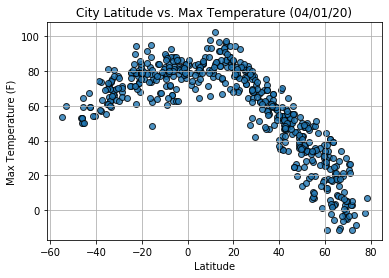

In [10]:

plt.show()

## Latitude vs. Humidity Plot

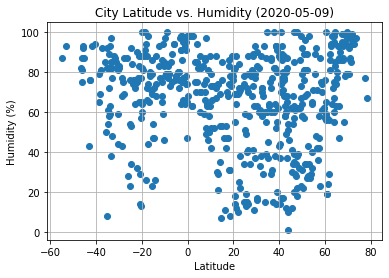

In [157]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"])
ax.set_title(f"City Latitude vs. Humidity ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()

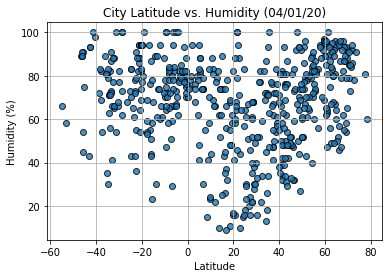

## Latitude vs. Cloudiness Plot

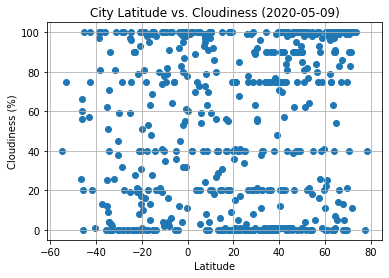

In [158]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"])
ax.set_title(f"City Latitude vs. Cloudiness ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()

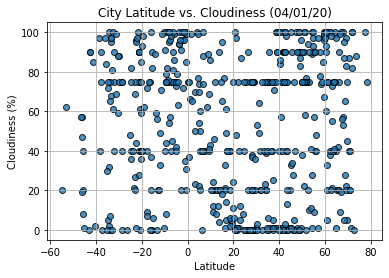

## Latitude vs. Wind Speed Plot

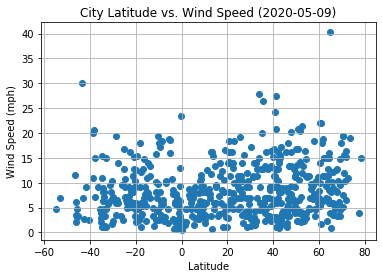

In [159]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"])
ax.set_title(f"City Latitude vs. Wind Speed ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()

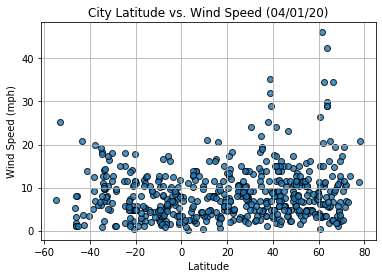

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

In [160]:
north=clean_city_data[clean_city_data["Latitude"]>0]
north

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,novoagansk,61.94,76.66,76.86,29,100,18.88,RU,2020-05-09
1,bubaque,11.28,-15.83,78.13,73,92,12.46,GW,2020-05-09
8,port hueneme,34.15,-119.20,64.40,87,90,5.82,US,2020-05-09
9,riyadh,24.69,46.72,93.20,15,34,10.29,SA,2020-05-09
10,qaanaaq,77.48,-69.36,5.29,77,0,3.85,GL,2020-05-09
...,...,...,...,...,...,...,...,...,...
556,butajira,8.12,38.37,71.80,52,8,10.33,ET,2020-05-09
557,krasnokamensk,50.10,118.04,62.78,31,90,4.72,RU,2020-05-09
558,pueblo rico,5.24,-76.04,66.81,88,100,1.45,CO,2020-05-09
559,lompoc,34.64,-120.46,61.00,100,90,5.82,US,2020-05-09


In [161]:
south=clean_city_data[clean_city_data["Latitude"]<0]
south

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,dois corregos,-22.37,-48.38,55.00,90,21,5.01,BR,2020-05-09
3,port alfred,-33.59,26.89,63.00,97,0,1.34,ZA,2020-05-09
4,rikitea,-23.12,-134.97,75.36,72,28,6.40,PF,2020-05-09
5,mataura,-46.19,168.86,50.72,87,66,3.47,NZ,2020-05-09
6,vaini,-21.20,-175.20,78.80,88,40,8.05,TO,2020-05-09
...,...,...,...,...,...,...,...,...,...
539,itarema,-2.92,-39.92,76.35,91,99,6.11,BR,2020-05-09
547,sao caetano do sul,-23.62,-46.55,57.20,76,90,5.82,BR,2020-05-09
551,tingi,-11.30,35.03,69.44,68,41,2.48,TZ,2020-05-09
553,mitsamiouli,-11.38,43.28,81.90,75,100,15.77,KM,2020-05-09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6101562522954074


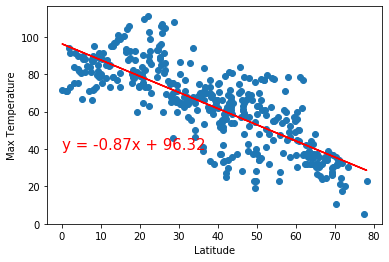

In [164]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.8271188905041935


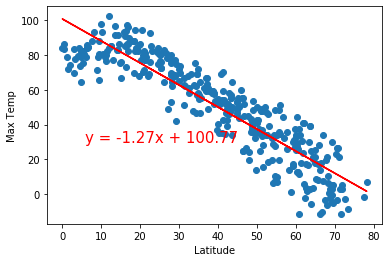

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4839749390863525


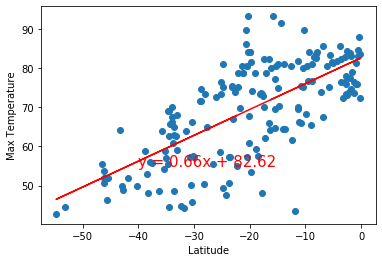

In [165]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.39936284758885965


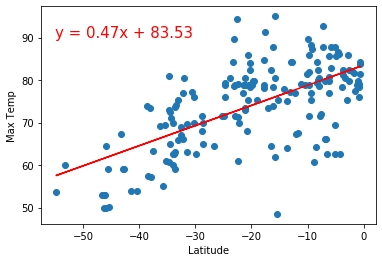

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.016830766487930877


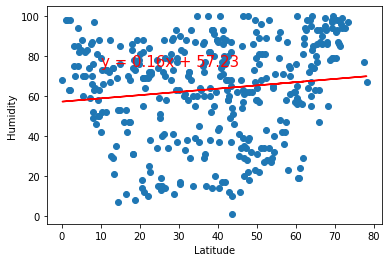

In [166]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,75),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.007206028121522881


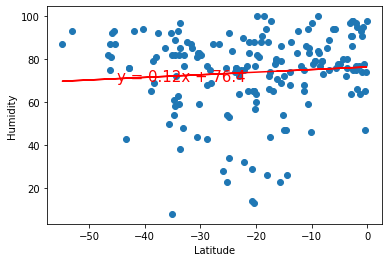

In [167]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,70),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.0008996079328825663


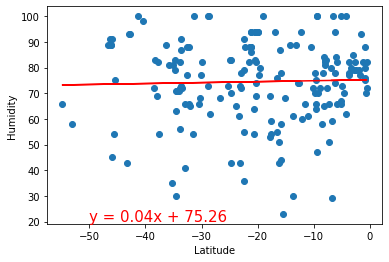

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.028916100338662248


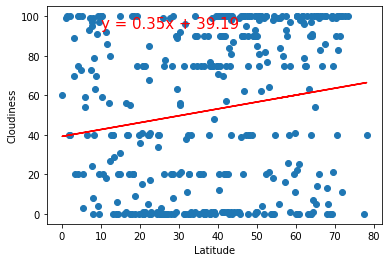

In [168]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,94),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.05768812657005063


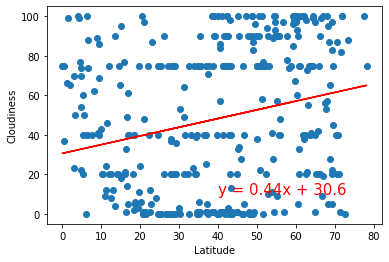

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.04038221657379739


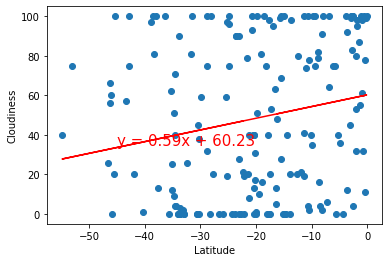

In [169]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.0684912094859049


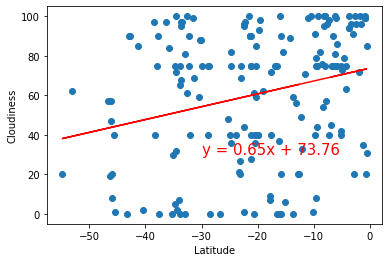

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.042246493506757334


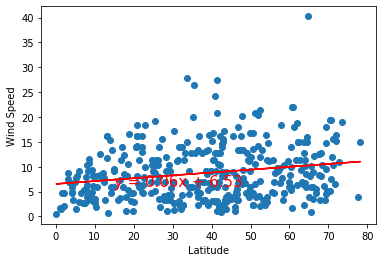

In [170]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,6),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.023371104533850804


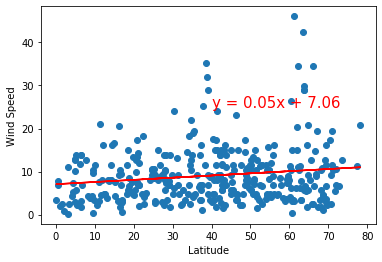

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.002648246456277482


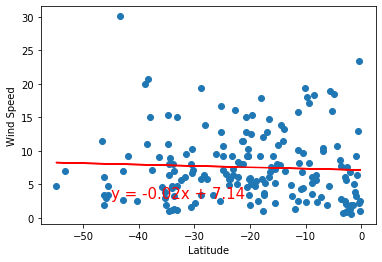

In [171]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,3),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()